In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import cycle
from sympy import *
import scipy
from scipy.special import lambertw as W

In [17]:
# Per Simulation
X = [0.8, 1.2, 3] # Robot Travel Distances

s = 5 # Minimum Gear Ratio (5)
b = 40 # Maximum Gear Ratio (25)

In [37]:
# Robot Constants
rw = 0.051 # Wheel Radius (meters)
m = 13 # Robot Mass (Kg)
I = 0.0015 # Rotational Inertia of drive system (Kg m^2)
E = 1 # Efficiency of wheel (Tank Drive = 1, Mecanum Drive = 0.7)
Vo = 12.5 # Battery Voltage (volts)
Rb = 0.15 # Battery internal resistance (ohms)

# Motor Constants
Vm = 12 # Nominal Motor Voltage
Ts = 4.2 / 40 # Stall torque (Nm)
wo = 15.7 * 40 # No load speed (Radians / Sec)
Io = 0.4 # No load current (Amps)
Is = 8.5 # Stall current (Amps)

nm = 4 # Number of motors

In [38]:
# Motor Constants
Km = Ts / Is
Ke = Vo / wo
Tf = Ts * Io / Is * nm
R = Rb + Vm / Is / nm

In [39]:
c3 = R*(rw**2*m + I*E)
c1 = (Vo*Km - R *Tf) / c3
c2 = -Ke*Km*E/c3


In [28]:
def loopTimeAtRatio(g, targetDist):
    x, v, t = 0. , 0., 0.
    dt = 0.001
    while x < targetDist:
        a = g*c1 - g**2*v*c2
        v = v + a*dt
        x = x + v*dt
        t = t + dt
    return t

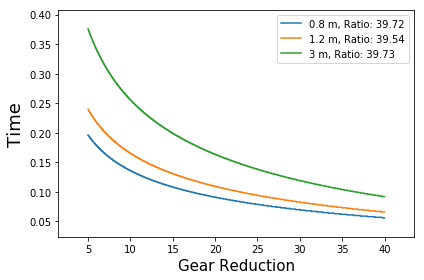

In [29]:
x_g = np.arange(s, b, 0.01)
y_t = np.zeros(((b-s)*100))

fig = plt.figure()
ax = fig.add_subplot(111)

for j, x in enumerate(X):
    for i, g in np.ndenumerate(x_g):
        y_t[i] = loopTimeAtRatio(g, x)
        
    ax.plot(x_g, y_t, label = str(X[j]) + " m, Ratio: " + str(round(x_g[np.argmin(y_t)], 3)))

ax.set_xlabel("Gear Reduction", fontsize=15)
ax.set_ylabel("Time", fontsize=18)

ax.legend(loc="best")

ax.margins(0.1)
fig.tight_layout()

plt.show()

In [30]:
distance = 1.2 # Meters

x_t = np.arange(1,10,1)
y_t = np.arange( 1,5, 0.5)

for i in range(1..3):
    

SyntaxError: invalid syntax (<ipython-input-30-558f42149d2d>, line 6)

In [31]:
x_t

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
print (c1)
print (c2)

8.134478463378818
-0.013844234113979476


In [36]:
print (c1)
print (c2)

8.134478463378818
-0.08694179023579111
